In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./Crop Production data.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIYA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIYA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIYA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIYA,2014,Winter,Rice,279151.0,597899.0


In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
df.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
df['Production']=df['Production'].fillna('0')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [12]:
df.describe()

,Crop_Year,Area
count,246091.000000,2.460910e+05
mean,2005.643018,1.200282e+04
std,4.952164,5.052340e+04
min,1997.000000,4.000000e-02
25%,2002.000000,8.000000e+01
50%,2006.000000,5.820000e+02
75%,2010.000000,4.392000e+03
max,2015.000000,8.580100e+06


In [13]:
df['State_Name'].value_counts()

Uttar Pradesh             33306
Madhya Pradesh            22943
Karnataka                 21122
Bihar                     18885
Assam                     14628
Odisha                    13575
Tamil Nadu                13547
Maharashtra               12628
Rajasthan                 12514
Chhattisgarh              10709
Andhra Pradesh             9628
West Bengal                9613
Gujarat                    8436
Haryana                    5875
TELANGANA                  5648
Uttarakhand                4896
Kerala                     4261
Nagaland                   3906
Punjab                     3173
Meghalaya                  2867
Arunachal Pradesh          2546
Himachal Pradesh           2494
JAMMU AND KASHMIR          1634
Tripura                    1412
Manipur                    1267
Jharkhand                  1266
Mizoram                     957
Puducherry                  876
Sikkim                      714
Dadra and Nagar Haveli      263
Goa                         208
ANDAMAN 

In [14]:
df.groupby('State_Name').value_counts()

State_Name           District_Name    Crop_Year  Season       Crop                 Area      Production 
ANDAMAN AND NICOBAR  NICOBAR ISLANDS  2000       Kharif       Arecanut             1254.00   2000.00        1
                                                              Other Kharif pulses  2.00      1.00           1
                     SOUTH ANDAMAN    2005       Whole Year   Coconut              7050.45   26430000.00    1
                                      2004       Whole Year   Black pepper         570.00    104.36         1
                                                              Cashewnut            116.50    25.10          1
                                                                                                           ..
West Bengal          BIRBHUM          1998       Whole Year   Dry chillies         522.00    844.00         1
                                                              Groundnut            41.00     37.00          1
               

In [18]:

print(df.dtypes)


State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object


In [19]:

df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
print(df['Production'].isnull().sum()) 

0


In [20]:

df.dropna(subset=['Production'], inplace=True)


print(df['Production'].isnull().sum())  


0


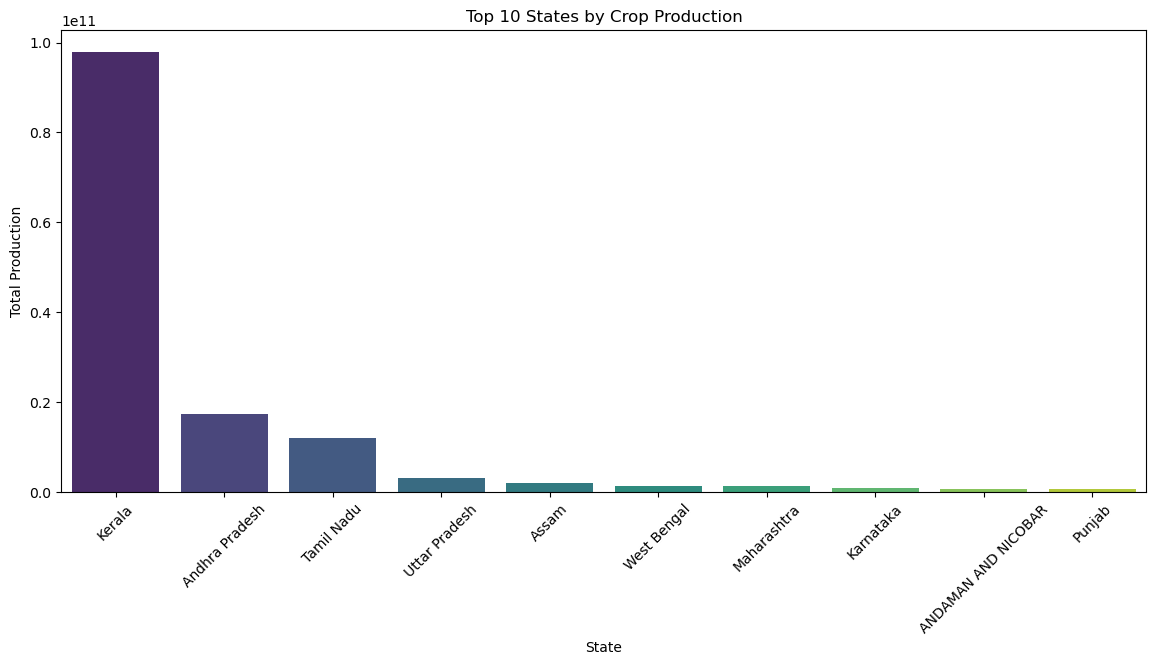

In [21]:
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index()

# Plotting the top 10 states by crop production
plt.figure(figsize=(14, 6))
sns.barplot(data=state_production.head(10), x='State_Name', y='Production', palette='viridis')
plt.title('Top 10 States by Crop Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()

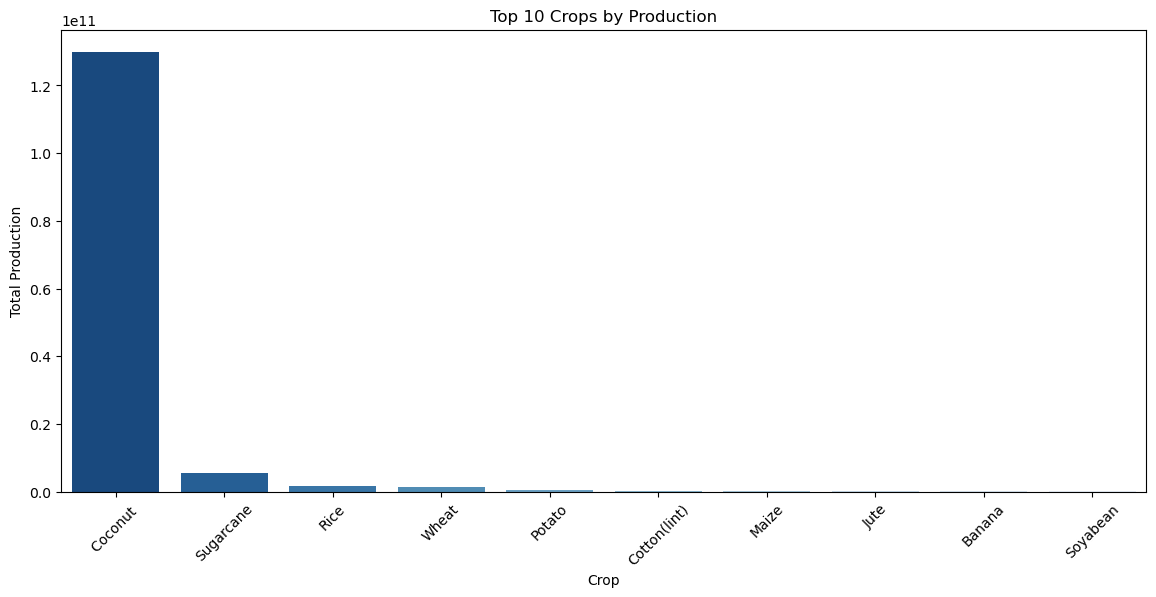

In [22]:
crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=crop_production.head(10), x='Crop', y='Production', palette='Blues_r')
plt.title('Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()

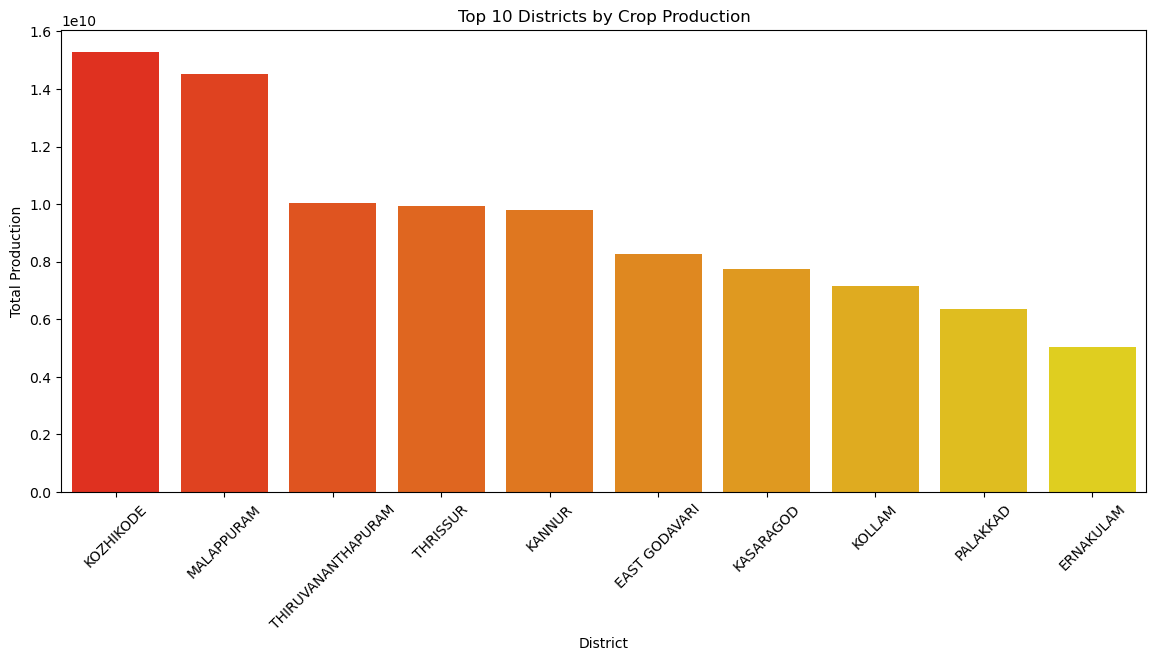

In [23]:
district_production = df.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=district_production.head(10), x='District_Name', y='Production', palette='autumn')
plt.title('Top 10 Districts by Crop Production')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()

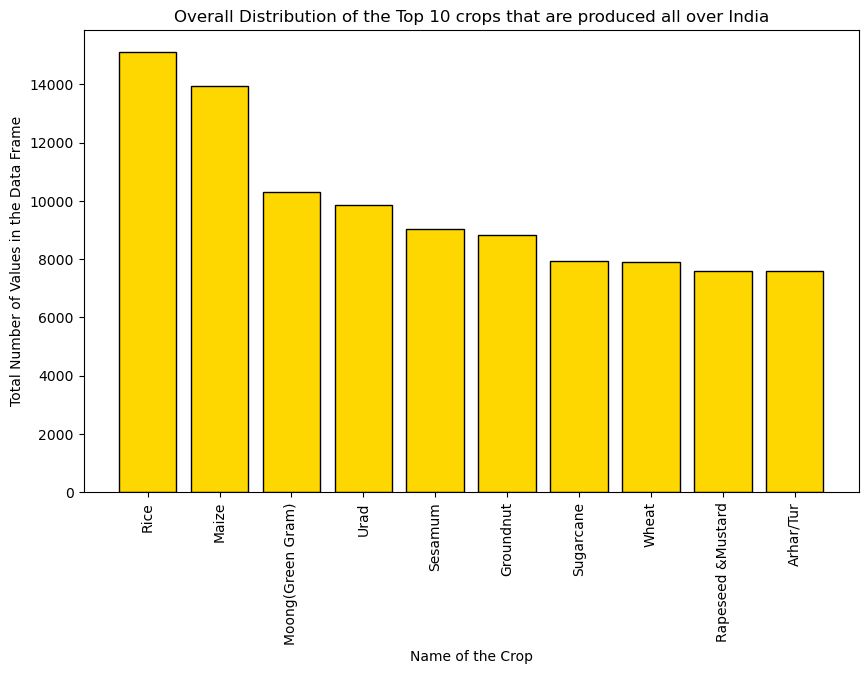

In [24]:
crop_counts = df['Crop'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(crop_counts.index, crop_counts.values, color='gold', edgecolor='black')

plt.title('Overall Distribution of the Top 10 crops that are produced all over India', fontsize=12)

plt.xticks(crop_counts.index, crop_counts.index, rotation=90)

plt.xlabel('Name of the Crop')
plt.ylabel('Total Number of Values in the Data Frame')

plt.show()

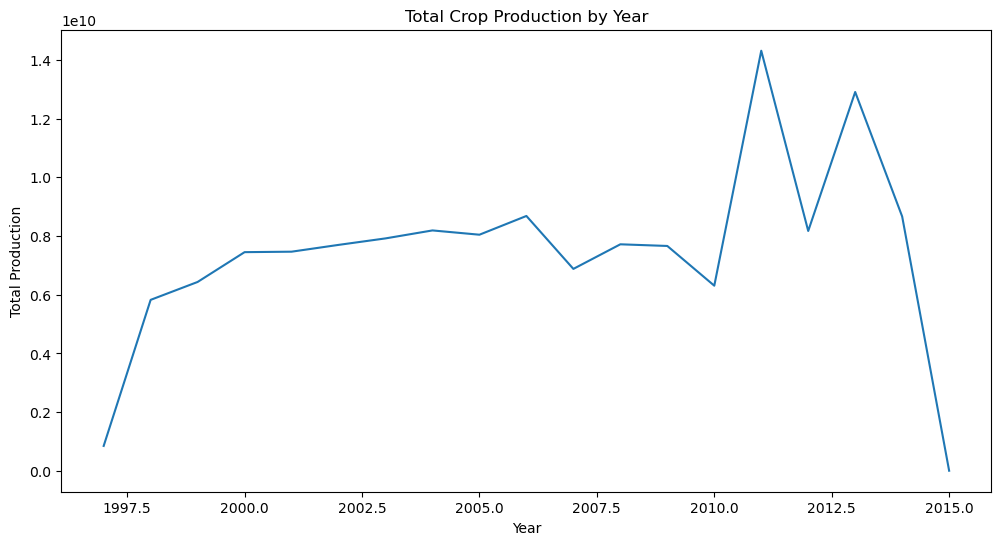

In [25]:
plt.figure(figsize=(12, 6))
production_by_year = df.groupby('Crop_Year')['Production'].sum().reset_index()
sns.lineplot(data=production_by_year, x='Crop_Year', y='Production')
plt.title('Total Crop Production by Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

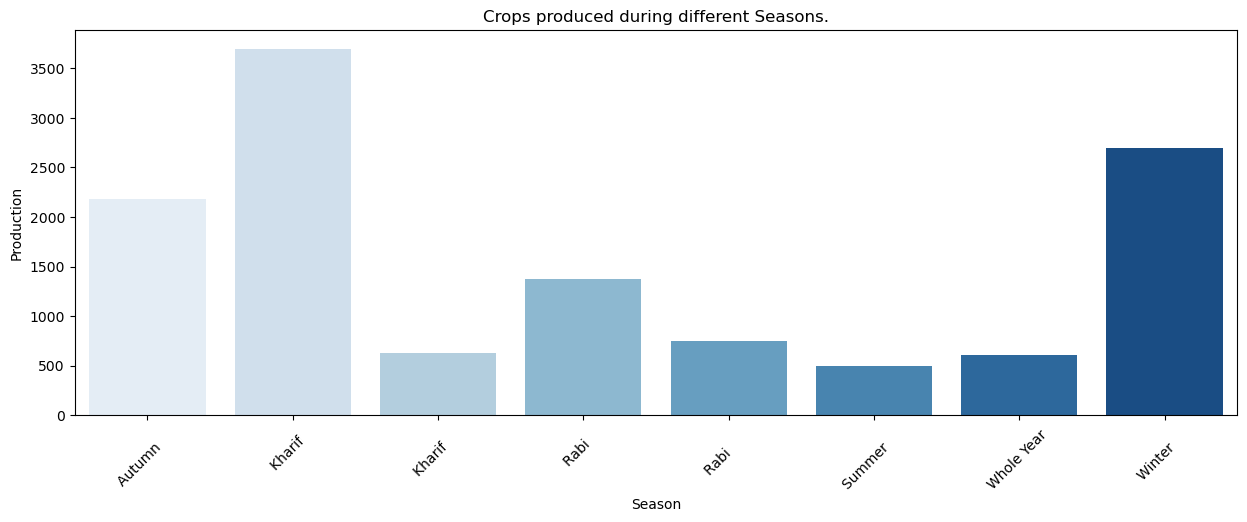

In [26]:
groupby_crop = df.groupby("Season")["Production"].median().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=groupby_crop["Season"], y=groupby_crop["Production"], palette='Blues')
plt.title("Crops produced during different Seasons.")
plt.xlabel("Season")
plt.ylabel("Production")
plt.xticks(rotation=45) 
plt.show()

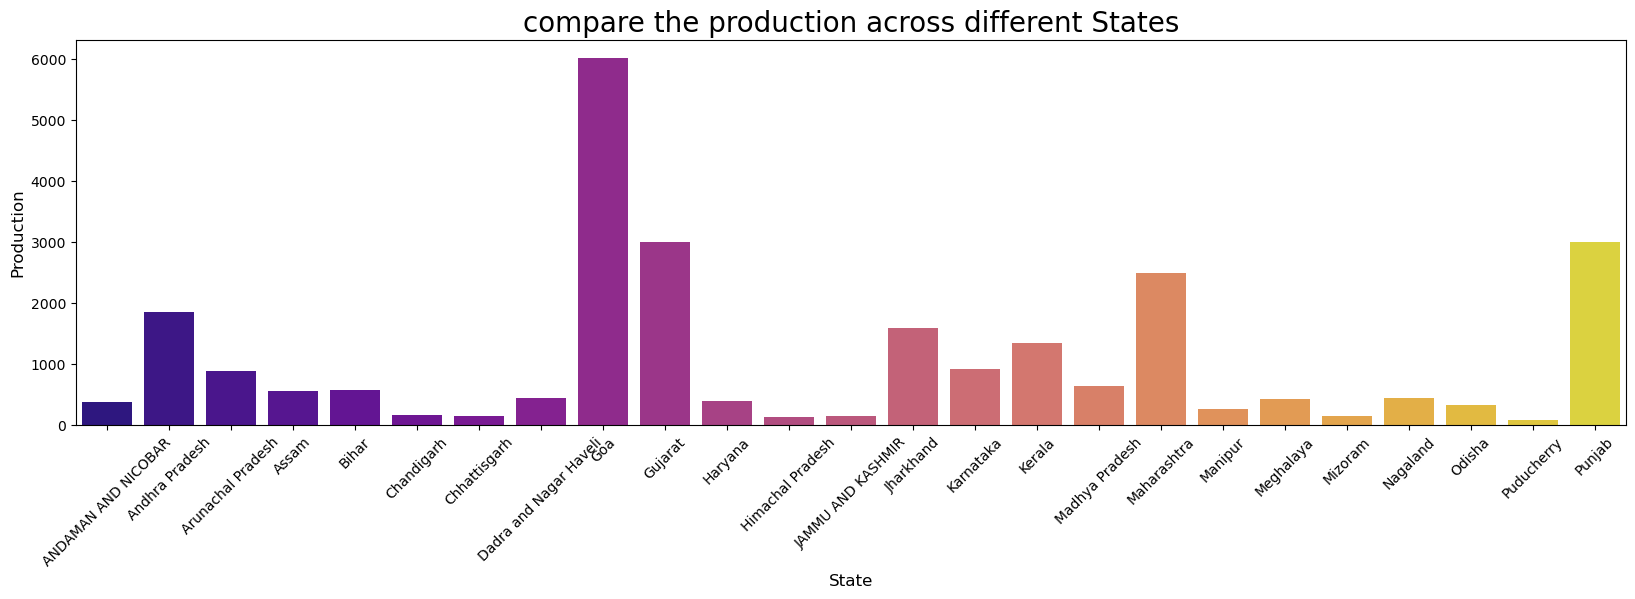

In [27]:
groupby_crop = df.groupby("State_Name")["Production"].median().reset_index().head(25)

plt.figure(figsize=(20,5))
sns.barplot(x=groupby_crop["State_Name"], y=groupby_crop["Production"], palette='plasma')
plt.title("compare the production across different States", fontsize=20)
plt.xlabel("State",  fontsize=12)
plt.ylabel("Production",  fontsize=12)
plt.xticks(rotation=45) 
plt.show()
